## **MOBILE PHONES**

**DATA SOURCE** 

This data was scrapped from jiji.ng website

**Problem Statement**
- To analyze the dataset generally
- To model the data by clustering for hidden insights 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('mobile_phones.csv')
df.head()

,PHONE_TYPE,RAM_STORAGE,NAIRA_PRICE,CITY,STATE,PHONE_CONDITION
0,New Google Pixel 7 Pro 256 GB White,6 GB,620000,Ikeja,Lagos State,Brand New
1,New Google Pixel 7 128 GB Black,6 GB,380000,Ikeja,Lagos State,Brand New
2,Samsung Galaxy Note 9 128 GB Blue,6 GB,135000,Alimosho,Lagos State,Used
3,Samsung Galaxy Note 20 5G 128GB Purple,6 GB,260000,Ikeja,Lagos State,Used
4,New Apple iPhone 14 Pro Max 128 GB,6 GB,900000,Ikeja,Lagos State,Brand New


**DATA CLEANING/WRANGLING**

In [3]:
# remove the word 'State' from the values in the 'State' column
df['STATE'] = df['STATE'].str.replace('State', '')


In [4]:
#create a new column 'COLOR' from phone_type
df['COLOR'] = df['PHONE_TYPE'].apply(lambda x: x.rsplit(
    ' ', 1)[1].split()[-1] if len(x.rsplit(' ', 1)[0].split()) > 1 else 'NA')
        
df.head()
#print(df)

,PHONE_TYPE,RAM_STORAGE,NAIRA_PRICE,CITY,STATE,PHONE_CONDITION,COLOR
0,New Google Pixel 7 Pro 256 GB White,6 GB,620000,Ikeja,Lagos,Brand New,White
1,New Google Pixel 7 128 GB Black,6 GB,380000,Ikeja,Lagos,Brand New,Black
2,Samsung Galaxy Note 9 128 GB Blue,6 GB,135000,Alimosho,Lagos,Used,Blue
3,Samsung Galaxy Note 20 5G 128GB Purple,6 GB,260000,Ikeja,Lagos,Used,Purple
4,New Apple iPhone 14 Pro Max 128 GB,6 GB,900000,Ikeja,Lagos,Brand New,GB


In [5]:
df['COLOR'].unique()

array(['White', 'Black', 'Blue', 'Purple', 'GB', 'Gray', 'Green', 'Gold',
       'Red', 'Pink', 'Silver', 'Bronze', 'Orange', 'Yellow', 'SG-2520',
       '128GB', 'TB'], dtype=object)

In [6]:
colors = ['White', 'Black', 'Blue', 'Purple', 'Gray', 'Green', 'Gold',
          'Red', 'Pink', 'Silver', 'Bronze', 'Orange', 'Yellow']
for color in df['COLOR']:
    if color not in colors:
        df['COLOR'].replace(color, 'NA', inplace=True)
df.head()


,PHONE_TYPE,RAM_STORAGE,NAIRA_PRICE,CITY,STATE,PHONE_CONDITION,COLOR
0,New Google Pixel 7 Pro 256 GB White,6 GB,620000,Ikeja,Lagos,Brand New,White
1,New Google Pixel 7 128 GB Black,6 GB,380000,Ikeja,Lagos,Brand New,Black
2,Samsung Galaxy Note 9 128 GB Blue,6 GB,135000,Alimosho,Lagos,Used,Blue
3,Samsung Galaxy Note 20 5G 128GB Purple,6 GB,260000,Ikeja,Lagos,Used,Purple
4,New Apple iPhone 14 Pro Max 128 GB,6 GB,900000,Ikeja,Lagos,Brand New,NA


In [7]:
df.shape

(3798, 7)

In [8]:
df.duplicated().any()

True

In [9]:
#Selects duplicate rows except first occurrence based on all columns
df[df. duplicated()]

,PHONE_TYPE,RAM_STORAGE,NAIRA_PRICE,CITY,STATE,PHONE_CONDITION,COLOR
18,Infinix Hot 8 32 GB,6 GB,43000,Ikorodu,Lagos,Used,NA
46,New Google Pixel 7 Pro 256 GB White,12 GB,620000,Ikeja,Lagos,Brand New,White
47,Samsung Galaxy Note 9 128 GB Blue,12 GB,135000,Alimosho,Lagos,Used,Blue
69,New Google Pixel 7 Pro 256 GB White,12 GB,620000,Ikeja,Lagos,Brand New,White
70,New Google Pixel 7 128 GB Black,12 GB,380000,Ikeja,Lagos,Brand New,Black
...,...,...,...,...,...,...,...
3787,Apple iPhone XR 64 GB Black,NaN,155000,Akure,Ondo,Used,Black
3794,Apple iPhone 13 128 GB Blue,NaN,460000,Ikeja,Lagos,Used,Blue
3795,New Google Pixel 7 Pro 256 GB White,4 GB,620000,Ikeja,Lagos,Brand New,White
3796,Apple iPhone XR 128 GB White,4 GB,205000,Ikeja,Lagos,Used,White


In [10]:
# dropping duplicate rows
df.drop_duplicates(inplace=True)

In [11]:
df.isna().sum()

PHONE_TYPE            0
RAM_STORAGE        1470
NAIRA_PRICE           0
CITY                  0
STATE                 0
PHONE_CONDITION       0
COLOR                 0
dtype: int64

In [12]:
#number of NaN values in color column
print(df['COLOR'].value_counts()['NA'])

79


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 3793
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PHONE_TYPE       2370 non-null   object
 1   RAM_STORAGE      900 non-null    object
 2   NAIRA_PRICE      2370 non-null   int64 
 3   CITY             2370 non-null   object
 4   STATE            2370 non-null   object
 5   PHONE_CONDITION  2370 non-null   object
 6   COLOR            2370 non-null   object
dtypes: int64(1), object(6)
memory usage: 148.1+ KB


In [14]:
#drop the unrequired
df.drop(['RAM_STORAGE'], axis=1, inplace=True)
df = df[df['COLOR'] != 'NA']

In [15]:
#shape of dataframe after droping duplicate rows
df.shape

(2291, 6)

### **EXPLORATORY DATA ANALYSIS**

In [16]:
df.describe(include='all')

,PHONE_TYPE,NAIRA_PRICE,CITY,STATE,PHONE_CONDITION,COLOR
count,2291,2.291000e+03,2291,2291,2291,2291
unique,639,NaN,103,23,3,13
top,Apple iPhone XR 64 GB Black,NaN,Ikeja,Lagos,Used,Black
freq,76,NaN,894,1038,1810,563
mean,NaN,2.638783e+05,NaN,NaN,NaN,NaN
std,NaN,1.916130e+05,NaN,NaN,NaN,NaN
min,NaN,1.000000e+04,NaN,NaN,NaN,NaN
25%,NaN,1.350000e+05,NaN,NaN,NaN,NaN
50%,NaN,2.200000e+05,NaN,NaN,NaN,NaN
75%,NaN,3.500000e+05,NaN,NaN,NaN,NaN


<Axes: ylabel='Density'>

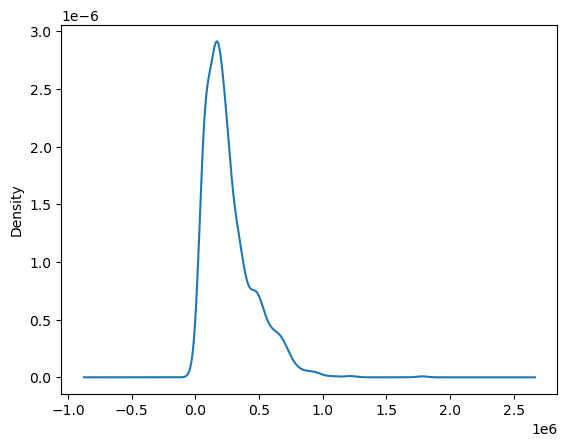

In [17]:
import matplotlib.pyplot as plt

#plot distribution of values in Marks column
df['NAIRA_PRICE'].plot(kind='kde')

Text(0.5, 1.0, 'Distribution of Phone Prices')

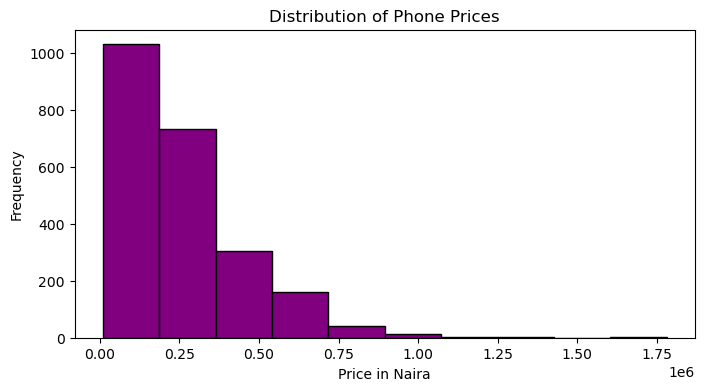

In [18]:
#Plot distribution of values in Marks column using histogram
df['NAIRA_PRICE'].plot(kind='hist', edgecolor='black', color='purple', figsize=(8, 4))
plt.xlabel('Price in Naira')
plt.title('Distribution of Phone Prices')

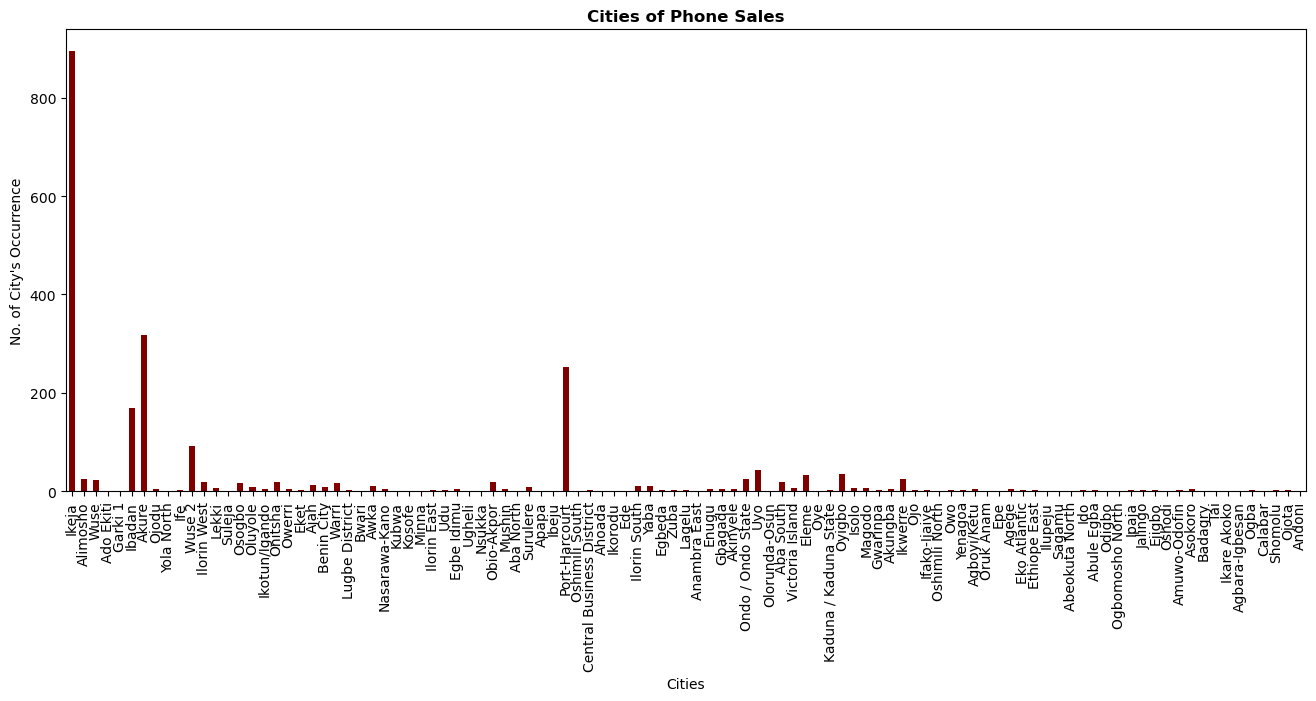

In [19]:
df['CITY'].value_counts(sort=False).plot.bar(color='maroon', figsize=(16, 6))
plt.xlabel('Cities')
plt.ylabel("No. of City's Occurrence")
plt.title('Cities of Phone Sales', fontweight='bold')
plt.xticks(rotation=90)
plt.show()

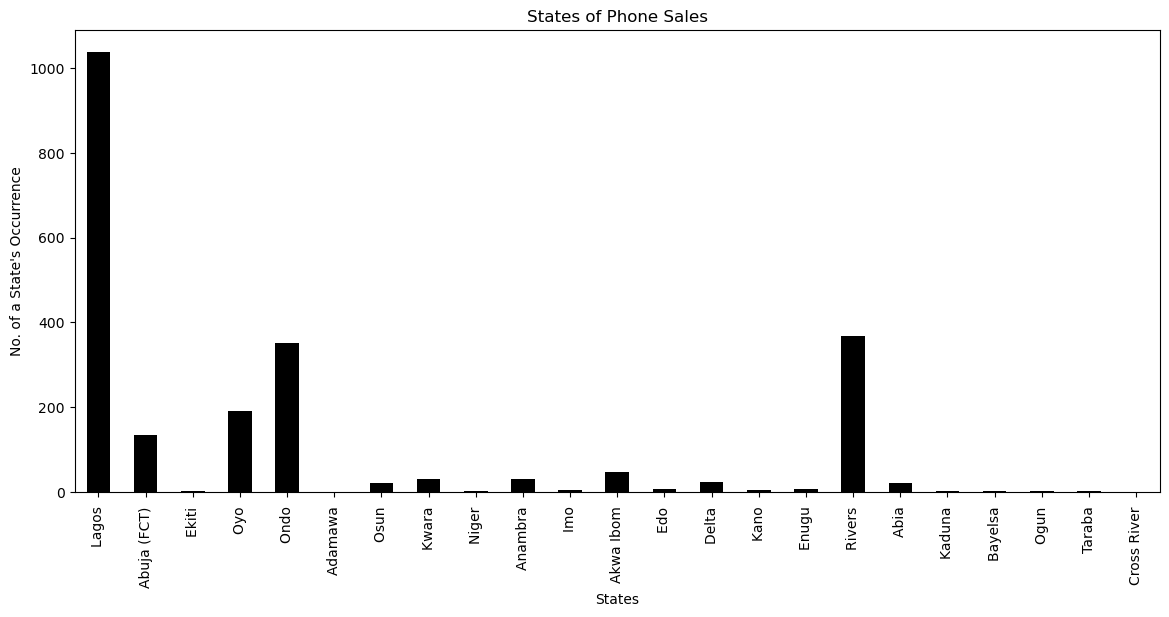

In [20]:
df['STATE'].value_counts(sort=False).plot.bar(color='black', figsize=(
    14, 6), title='States of Phone Sales')
plt.xlabel('States')
plt.ylabel("No. of a State's Occurrence")
plt.xticks(rotation=90)
plt.show()

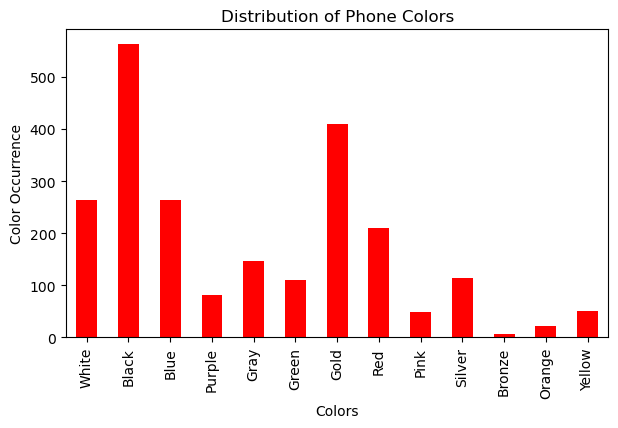

In [21]:
df['COLOR'].value_counts(sort=False).plot.bar(color='red', figsize=(
    7, 4), title='Distribution of Phone Colors')
plt.xlabel('Colors')
plt.ylabel("Color Occurrence")
plt.xticks(rotation=90)
plt.show()

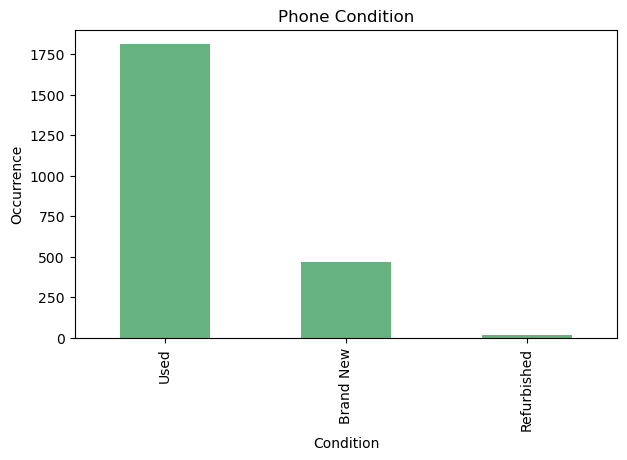

In [22]:
df['PHONE_CONDITION'].value_counts().plot.bar(title='Phone Condition', color=(0.4, 0.7, 0.5), figsize=(
    7, 4))
plt.xlabel('Condition')
plt.ylabel('Occurrence')
plt.xticks(rotation=90)
plt.show()

In [23]:
phone_brand = ['Apple','Alcatel','Doogee','Gionee','Google','Huawei','Hydrogen','Honor','HTC','infinix','Itel','Iridium','Lenovo','LeEco','LG','Microsoft','Motorola','Nokia','Oppo','OnePlus','Oukitel','Philips','Samsung','Sony Ericsson','Sony','Sowhat','Tecno','Thuraya','Vivo','Xiaomi','ZTE']

In [24]:
from collections import Counter

# Define a function to extract the brand from the phone type
def extract_brand(phone_type):
    for brand in phone_brand:
        if brand.lower() in phone_type.lower():
            return brand
    return 'Others'

# Apply the extract_brand function to create a new column 'BRAND'
df['BRAND'] = df['PHONE_TYPE'].apply(extract_brand)

# Count the occurrences of each brand
brand_counts = Counter(df['BRAND'])

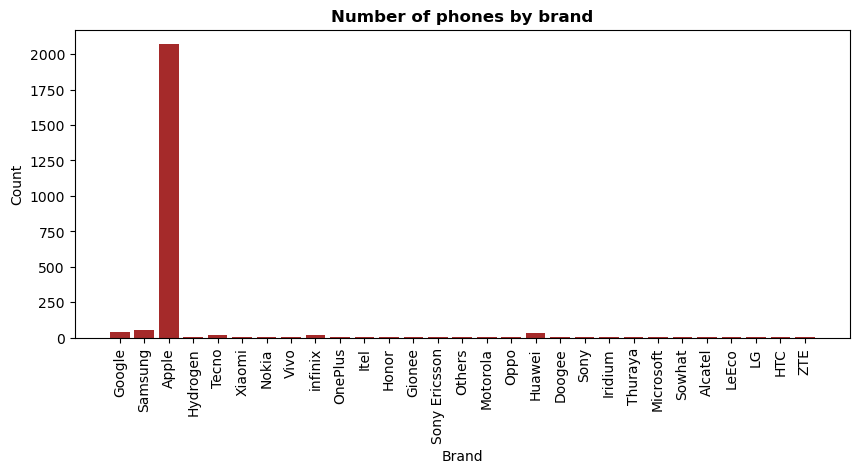

In [25]:
# Plot a bar graph of the brands
plt.figure(figsize=(10, 4))
plt.bar(range(len(brand_counts)), list(brand_counts.values()), align='center', color='brown')
plt.xticks(range(len(brand_counts)), list(
    brand_counts.keys()), rotation='vertical')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Number of phones by brand', fontweight='bold')
plt.show()

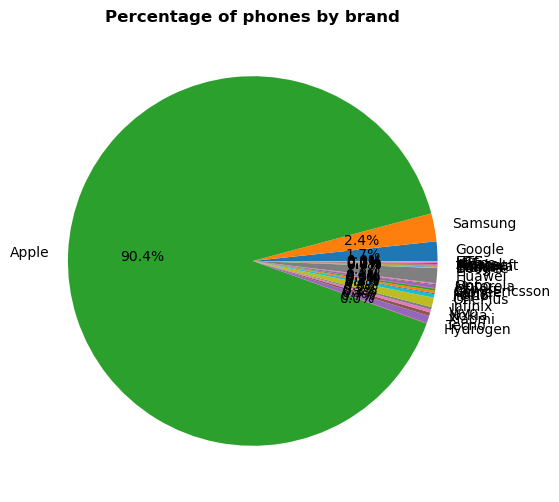

In [26]:
# Plot a pie chart of the brands
plt.figure(figsize=(6, 6))
plt.pie(list(brand_counts.values()), labels=list(
    brand_counts.keys()), autopct='%1.1f%%')
plt.title('Percentage of phones by brand', fontweight='bold')
plt.show()

In [27]:
# Calculate the percentage of each brand
total = sum(brand_counts.values())
brand_percentages = {k: v / total * 100.0 for k, v in brand_counts.items()}

# Create a dataframe of the brand percentages
df_percentages = pd.DataFrame.from_dict(
    brand_percentages, orient='index', columns=['Percentage'])
df_percentages.index.name = 'Brand'
df_percentages = df_percentages.sort_values(by='Percentage', ascending=False)

# Display the dataframe
print(df_percentages)


               Percentage
Brand                    
Apple           90.353557
Samsung          2.444347
Google           1.702313
Huawei           1.309472
infinix          0.829332
Tecno            0.654736
Xiaomi           0.305543
OnePlus          0.305543
Others           0.261894
Nokia            0.261894
Vivo             0.218245
Honor            0.218245
Gionee           0.174596
Motorola         0.087298
Oppo             0.087298
LG               0.087298
LeEco            0.087298
Itel             0.087298
Thuraya          0.087298
Sowhat           0.043649
HTC              0.043649
Alcatel          0.043649
Sony             0.043649
Microsoft        0.043649
Iridium          0.043649
Doogee           0.043649
Hydrogen         0.043649
Sony Ericsson    0.043649
ZTE              0.043649


***Summary Analysis***

The phones present in this website for sale as at the time of data collection are mostly used: more than 1750 used phones; a mean and median price of 263878 naira and 220000 naira respectively: accounting for the positive skewness of the phone prices as can be seen in the histogram and density plots, and largely sold for about 125000 naira (modal price), a little over 1.7 million naira is maximum price of the phones. The highest phone brand, which is approximately 90.4% of the total phones present is Apple. Majority of the phones (almost 600 phones) are black in color; of the 2291 phones currently in the website, about 900 phones are provided for purchase from the city of Ikeja alone, and above 1000 phones from Lagos State as a whole.

According to Corporate Finance Institute, the positive skewness of a distribution indicates that an investor may expect frequent small losses and a few large gains from investment. The positively skewed distributions of investment returns are generally more desired by investors since there is some probability of gaining huge profits that can cover all the frequent small losses.  

### **MODELING**

**KMEANS - Exclusive Clustering**

In [28]:
df.columns

Index(['PHONE_TYPE', 'NAIRA_PRICE', 'CITY', 'STATE', 'PHONE_CONDITION',
       'COLOR', 'BRAND'],
      dtype='object')

In [29]:
new_df = df.iloc[:,1:]
new_df.columns

Index(['NAIRA_PRICE', 'CITY', 'STATE', 'PHONE_CONDITION', 'COLOR', 'BRAND'], dtype='object')

In [30]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

x = new_df.loc[:, ['NAIRA_PRICE']].values
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)
scaled_price = pd.DataFrame(scaled, columns = ['naira_price'])   

encoder = OrdinalEncoder()  
odl = encoder.fit_transform(new_df[['CITY', 'STATE', 'PHONE_CONDITION', 'COLOR', 'BRAND']])
odl_cols = pd.DataFrame(odl, columns = ['city', 'state','condition','color','brand'])

transformed_df = pd.concat(
    [scaled_price, odl_cols], axis=1)  


In [31]:
transformed_df 

,naira_price,city,state,condition,color,brand
0,0.344633,44.0,15.0,0.0,11.0,4.0
1,0.209040,44.0,15.0,0.0,0.0,4.0
2,0.070621,13.0,15.0,2.0,1.0,19.0
3,0.141243,44.0,15.0,2.0,8.0,19.0
4,0.192090,44.0,15.0,2.0,4.0,1.0
...,...,...,...,...,...,...
2286,0.129944,38.0,20.0,2.0,3.0,1.0
2287,0.172316,66.0,21.0,2.0,3.0,1.0
2288,0.067797,12.0,18.0,2.0,11.0,1.0
2289,0.163842,44.0,15.0,2.0,10.0,1.0


In [32]:
r = transformed_df.loc[:,'naira_price']
s = transformed_df.loc[:,'city']
t = transformed_df.loc[:,'state']
a = transformed_df.loc[:,'condition']
v = transformed_df.loc[:,'color']
w = transformed_df.loc[:,'brand'] 

data = list(zip(r, s, t, a, v, w))

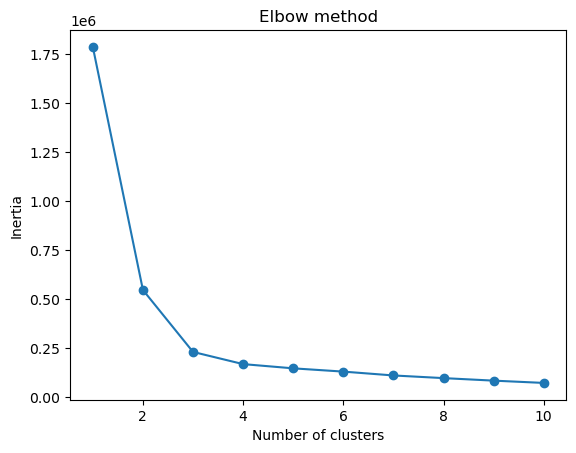

In [33]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

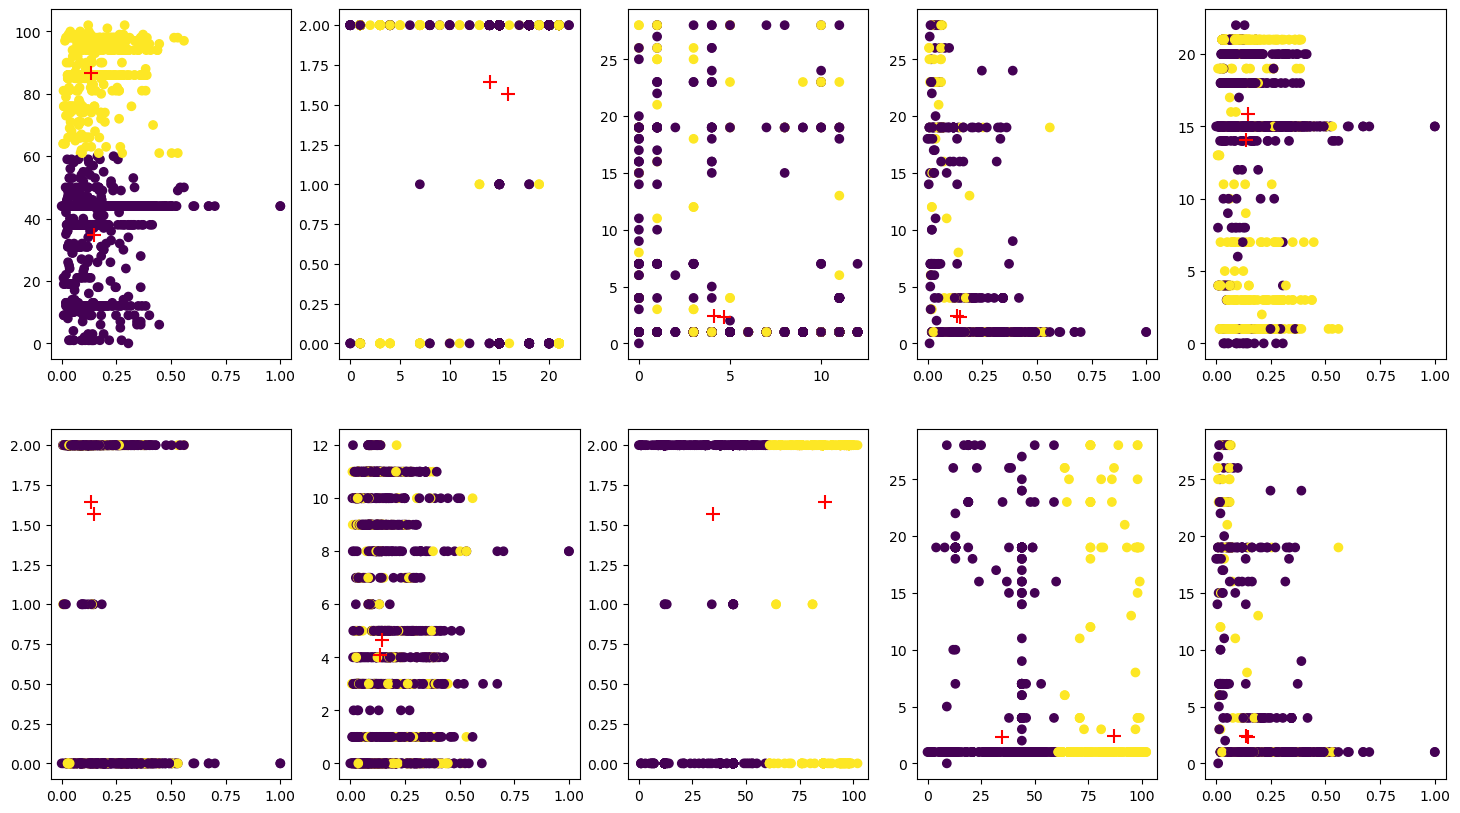

In [34]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.figure(figsize=(18, 10))
plt.subplot(251)
plt.scatter(r, s, c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 1], marker='+', s=100, c='red', zorder=10)
plt.subplot(252)
plt.scatter(t, a, c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[
            :, 3], marker='+', s=100, c='red', zorder=10)
plt.subplot(253)
plt.scatter(v, w, c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[
            :, 5], marker='+', s=100, c='red', zorder=10)
plt.subplot(254)
plt.scatter(r, w, c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 5], marker='+', s=100, c='red', zorder=10)
plt.subplot(255)
plt.scatter(r, t, c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 2], marker='+', s=100, c='red', zorder=10)
plt.subplot(256)
plt.scatter(r, a, c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 3], marker='+', s=100, c='red', zorder=10)
plt.subplot(257)
plt.scatter(r, v, c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 4], marker='+', s=100, c='red', zorder=10)
plt.subplot(258)
plt.scatter(s, a, c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[
            :, 3], marker='+', s=100, c='red', zorder=10)
plt.subplot(259)
plt.scatter(s, w, c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[
            :, 5], marker='+', s=100, c='red', zorder=10)
plt.subplot(2,5,10)
plt.scatter(r, w, c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 5], marker='+', s=100, c='red', zorder=10)
plt.show()

In [35]:
print(kmeans.cluster_centers_)

[[ 0.14671496 34.74759036 15.87590361  1.56686747  4.65120482  2.31325301]
 [ 0.13480279 86.77337559 14.07448494  1.64183835  4.09667195  2.37559429]]


**FUZZY CMEANS - Overlapping Clustering**

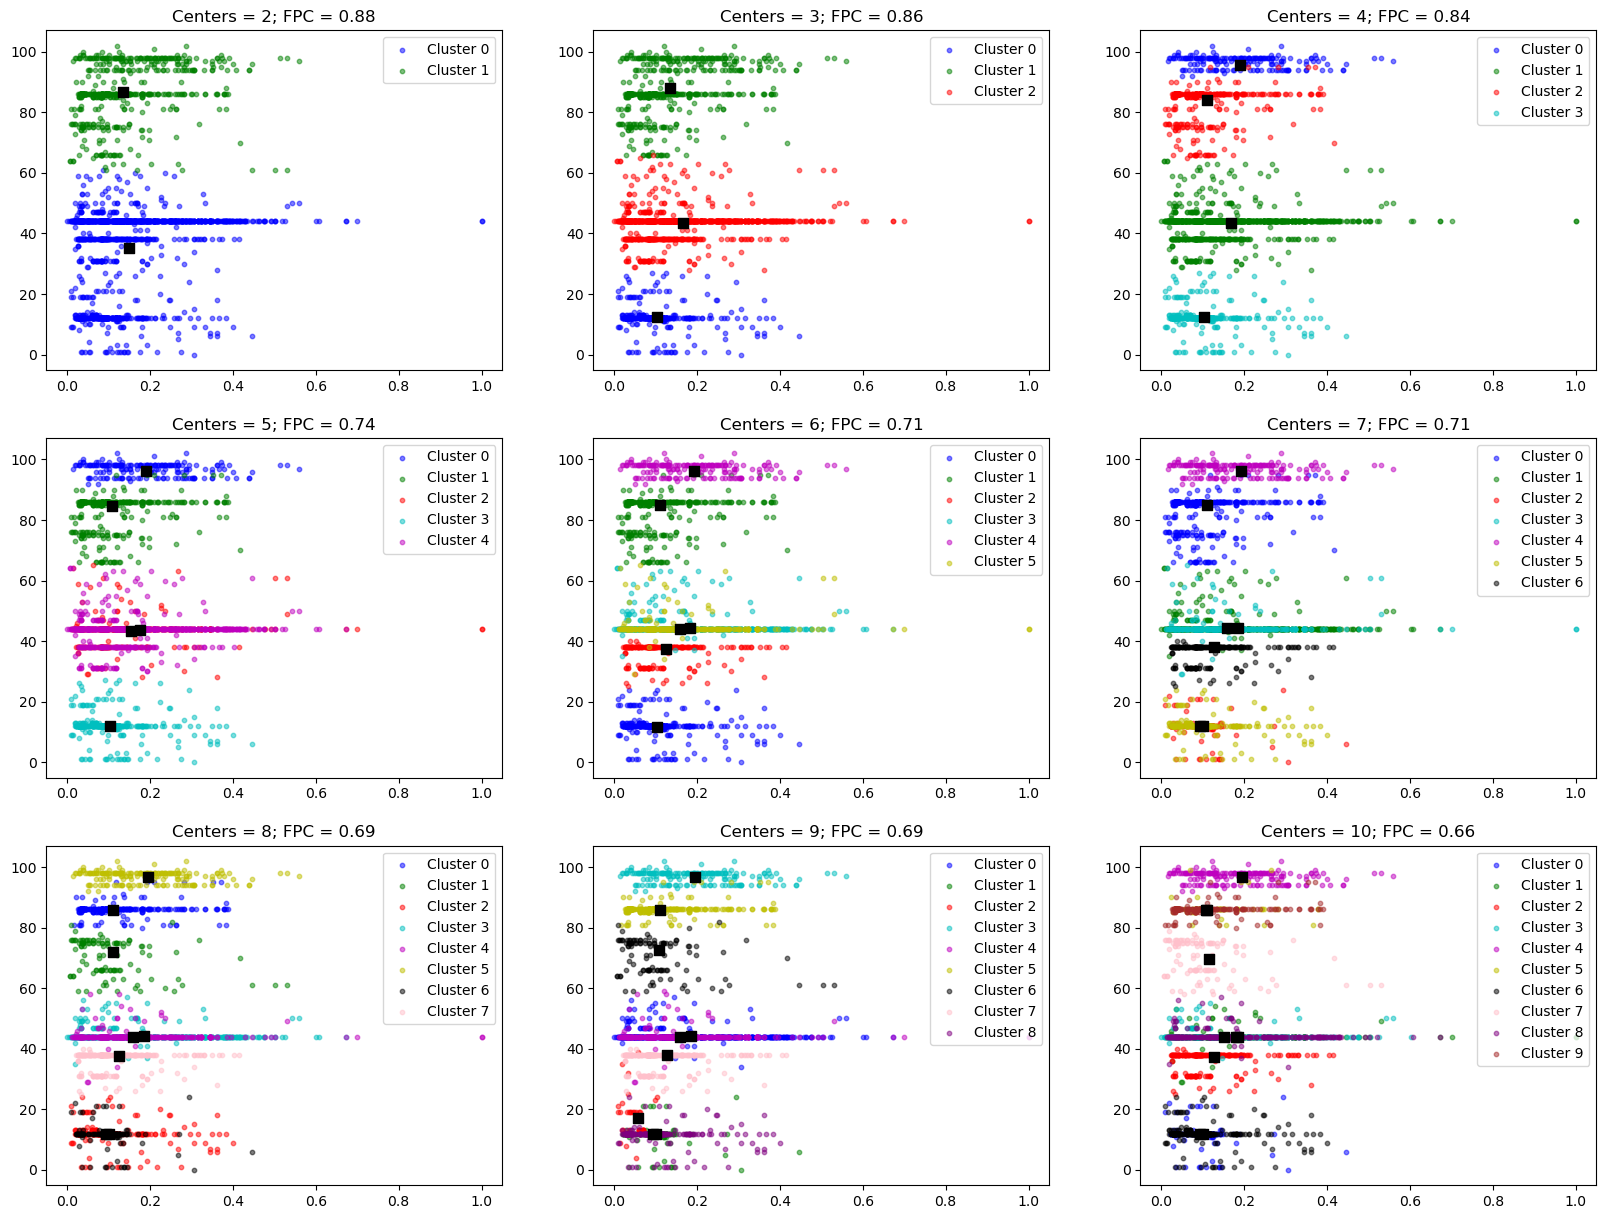

In [36]:
import skfuzzy as fuzz

# Set up the loop and plot
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
alldata = np.vstack((r, s, t, a, v, w))
fpcs = []
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink', 'purple', 'brown', 'maroon']  # Define colors for clusters

for ncenters, ax in enumerate(axes.flatten(), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)
    # Store fpc values for later
    fpcs.append(fpc)
    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.scatter(r[cluster_membership == j],
                   s[cluster_membership == j],
                   c=colors[j],
                   s=10,
                   alpha=0.5,
                   label='Cluster {}'.format(j))
    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.scatter(pt[0], pt[1], marker='s', s=50, color='black')
    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.legend()
plt.show()

***Model Insights***
1. KMeans Method

    The Elbow method of this model is used to determine the number of clusters, k which showed that two clusters are adequate. Clusters were plotted: scatter plots between phone price and city location; city and phone condition (whether used, brand new or refurbished); city location and phone brand, showed two distinct blobs, others were mixed up. For the distinct ones, it means that there is somewhat relationship or correlation between the cities (location) where phones are offered for sale and the phone price, brand and condition; that is, sellers in a group of cities offer better or otherwise deals than the others.

2. Fuzzy CMeans Method

    An iteration from 2 to 10 centers was done to determine the Fuzzy Partition Coefficient (FPC); at Centers=2 gave the best FPC of 0.88; which concurred with the Elbow method of KMeans that k=2 is the best number of clusters for the data. As the data points were divided into more clusters with center, there is seen a decline in the FPC score of the model. The iteration was done because the data is not clearly clustered and also to determine how many clusters should be expected. Since both the hard and overlapping clustering methods agreed on the number of clusters, therefore, the inference above is valid. 
    Fuzzy logic principles can be used to cluster multidimensional data, as in this case, assigning each data point a membership in each cluster center from 0 to 100 percent. This can be very powerful compared to traditional hard-thresholded clustering where
    every point is assigned a crisp, exact label.

### **MODEL EVALUATION**

The FPC is defined on the range from 0 to 1, with 1 being best. It is a metric which tells us how cleanly our data is described by a certain model. Next, I'll cluster the data - which has two clusters - several times, between 2 and 10 clusters. The results of the clustering will be shown, that is the fuzzy partition coefficient. When the FPC is maximized, our data is described best.

Text(0, 0.5, 'Fuzzy partition coefficient')

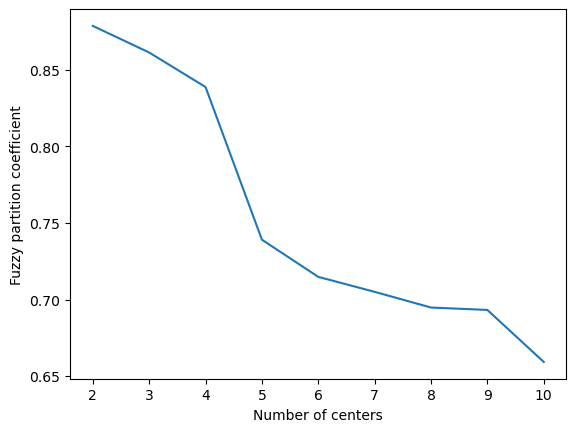

In [37]:
fig, ax = plt.subplots()
ax.plot(np.r_[2:11], fpcs)
ax.set_xlabel("Number of centers")
ax.set_ylabel("Fuzzy partition coefficient")

As can be seen above, the ideal number of centers is 2 and FPC is approximately 0.88. Having the FPC available can be very useful when the structure of your data is unclear.